In [1]:
from transformer_pipeline import get_features_transformer, drop_rows
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import  seaborn as sns
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import PowerTransformer, RobustScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/movie_statistic_dataset.csv")

df = drop_rows(df)
transformer = get_features_transformer(PowerTransformer(method='box-cox'), 
                                       PowerTransformer(method='box-cox'), 
                                       RobustScaler(), 
                                       StandardScaler())
X = transformer.fit_transform(df)

# PCA

In [3]:
from sklearn.decomposition import PCA

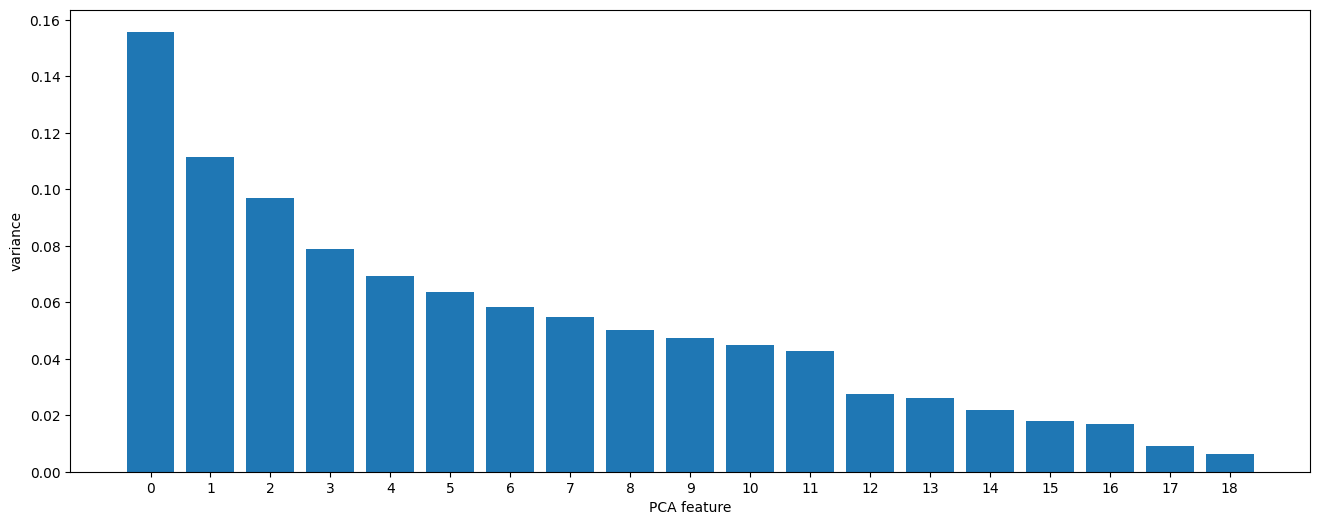

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


pca = PCA(svd_solver="full")
scaler = StandardScaler()

pipe = make_pipeline(scaler,pca)

pipe.fit(X)
features = range(pca.n_components_)
plt.figure(figsize=(16, 6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [5]:
sum = 0
i = 1
while sum < 0.9:
    sum = np.sum(pca.explained_variance_ratio_[0:i])
    i += 1
print("Sum:", sum, "number of PCA features:", i)

Sum: 0.9015464835813926 number of PCA features: 14


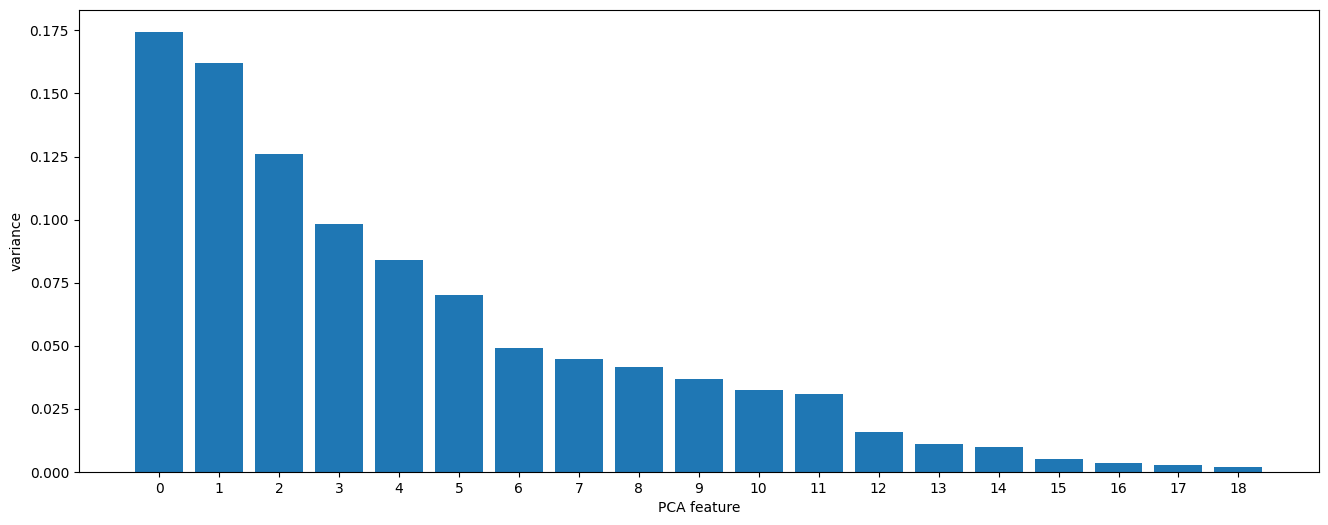

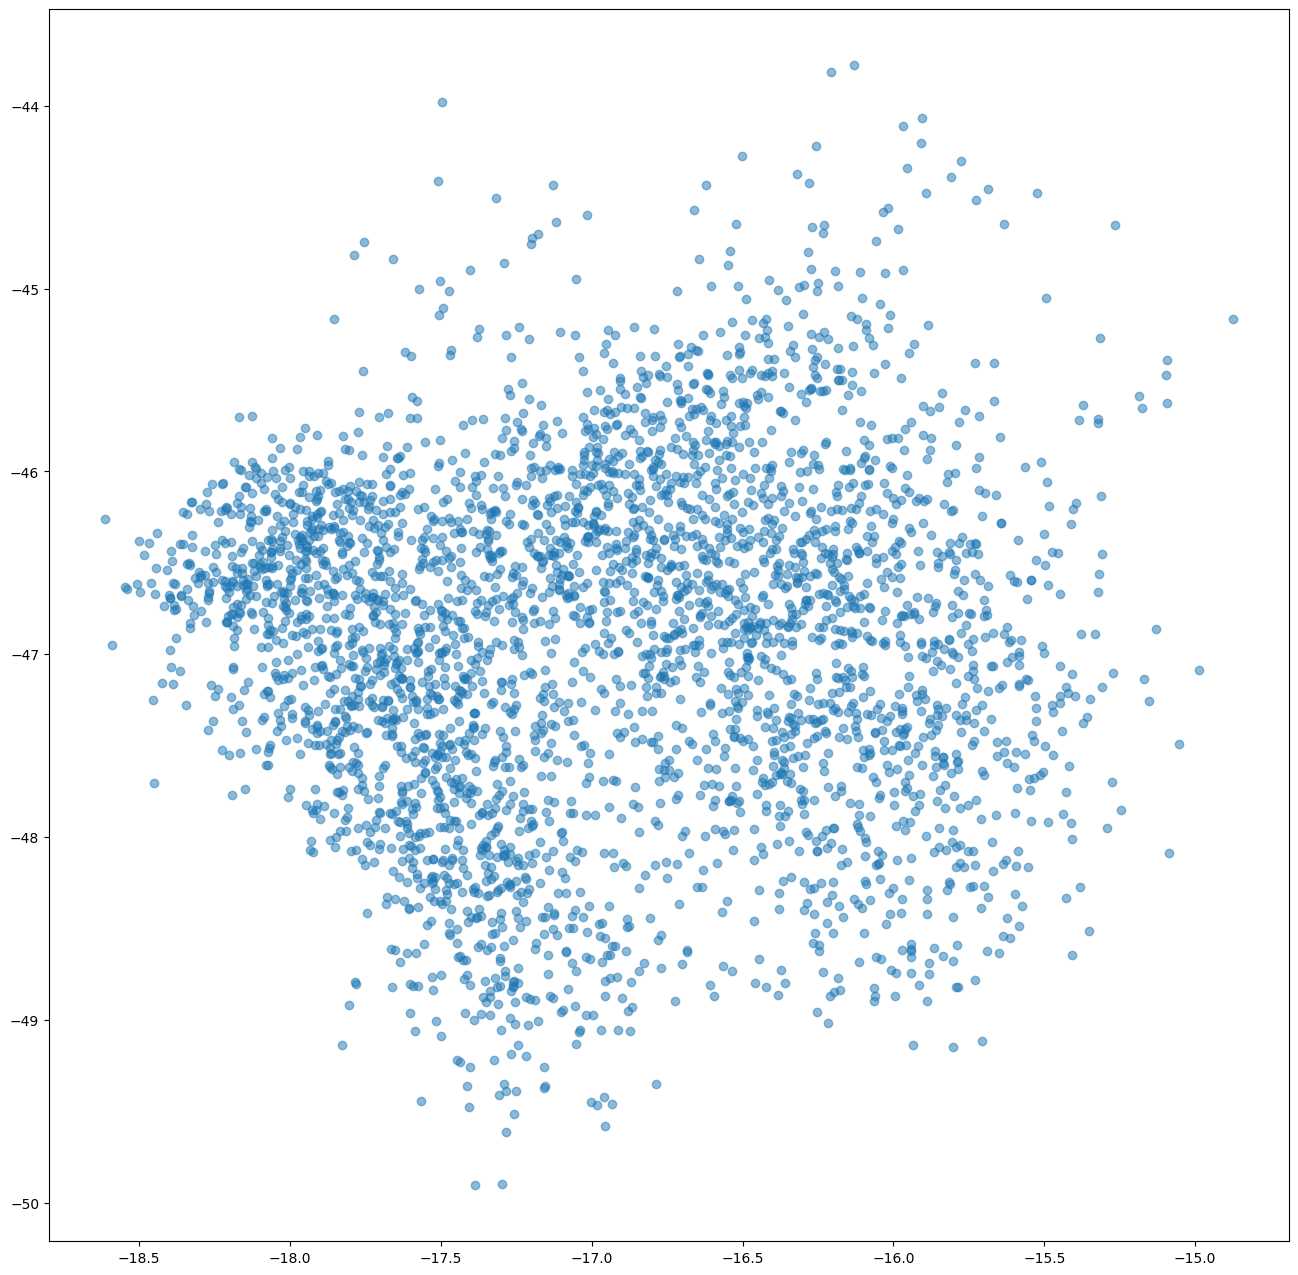

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline


pca = PCA(svd_solver="full")
scaler = MinMaxScaler()

pipe = make_pipeline(scaler,pca)

pipe.fit(X)
features = range(pca.n_components_)
plt.figure(figsize=(16, 6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

X_transformed = pca.transform(X)
X_transformed.shape

plt.figure(figsize=(16, 16))
plt.scatter(X_transformed[:,0],X_transformed[:,1], alpha= 0.5)
plt.show()

In [7]:
sum = 0
i = 1
while sum < 0.9:
    sum = np.sum(pca.explained_variance_ratio_[0:i])
    i += 1

In [8]:
print("Sum:", sum, "number of PCA features:", i)

Sum: 0.9197431587918662 number of PCA features: 12


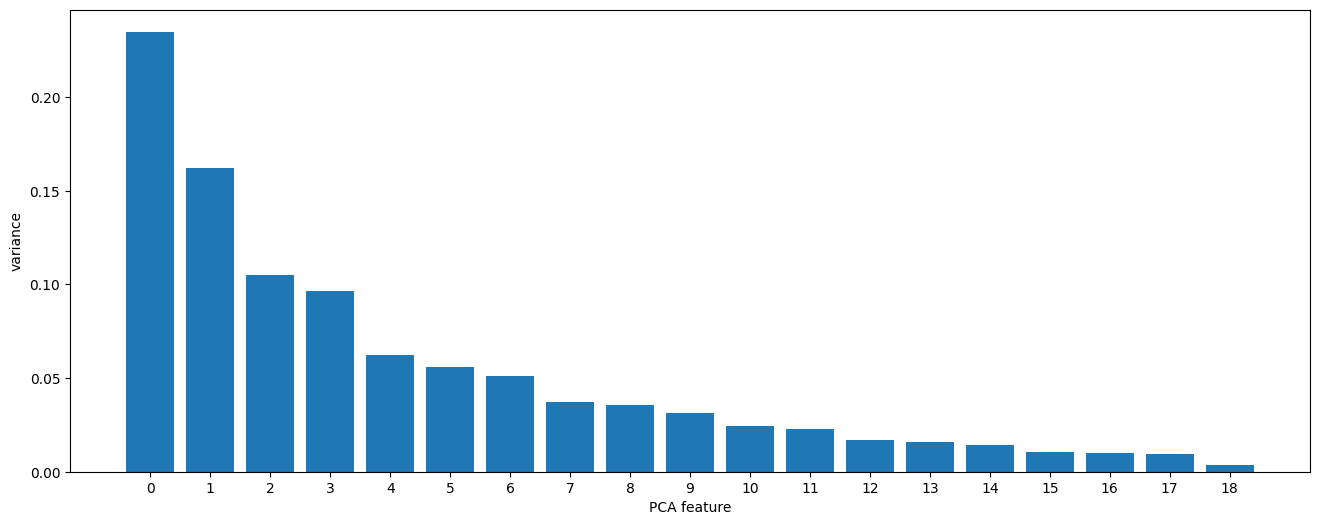

In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline


pca = PCA(svd_solver="full")
scaler = RobustScaler()

pipe = make_pipeline(scaler,pca)

pipe.fit(X)
features = range(pca.n_components_)
plt.figure(figsize=(16, 6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [10]:
X_transformed = pca.transform(X)
X_transformed.shape


(3490, 19)

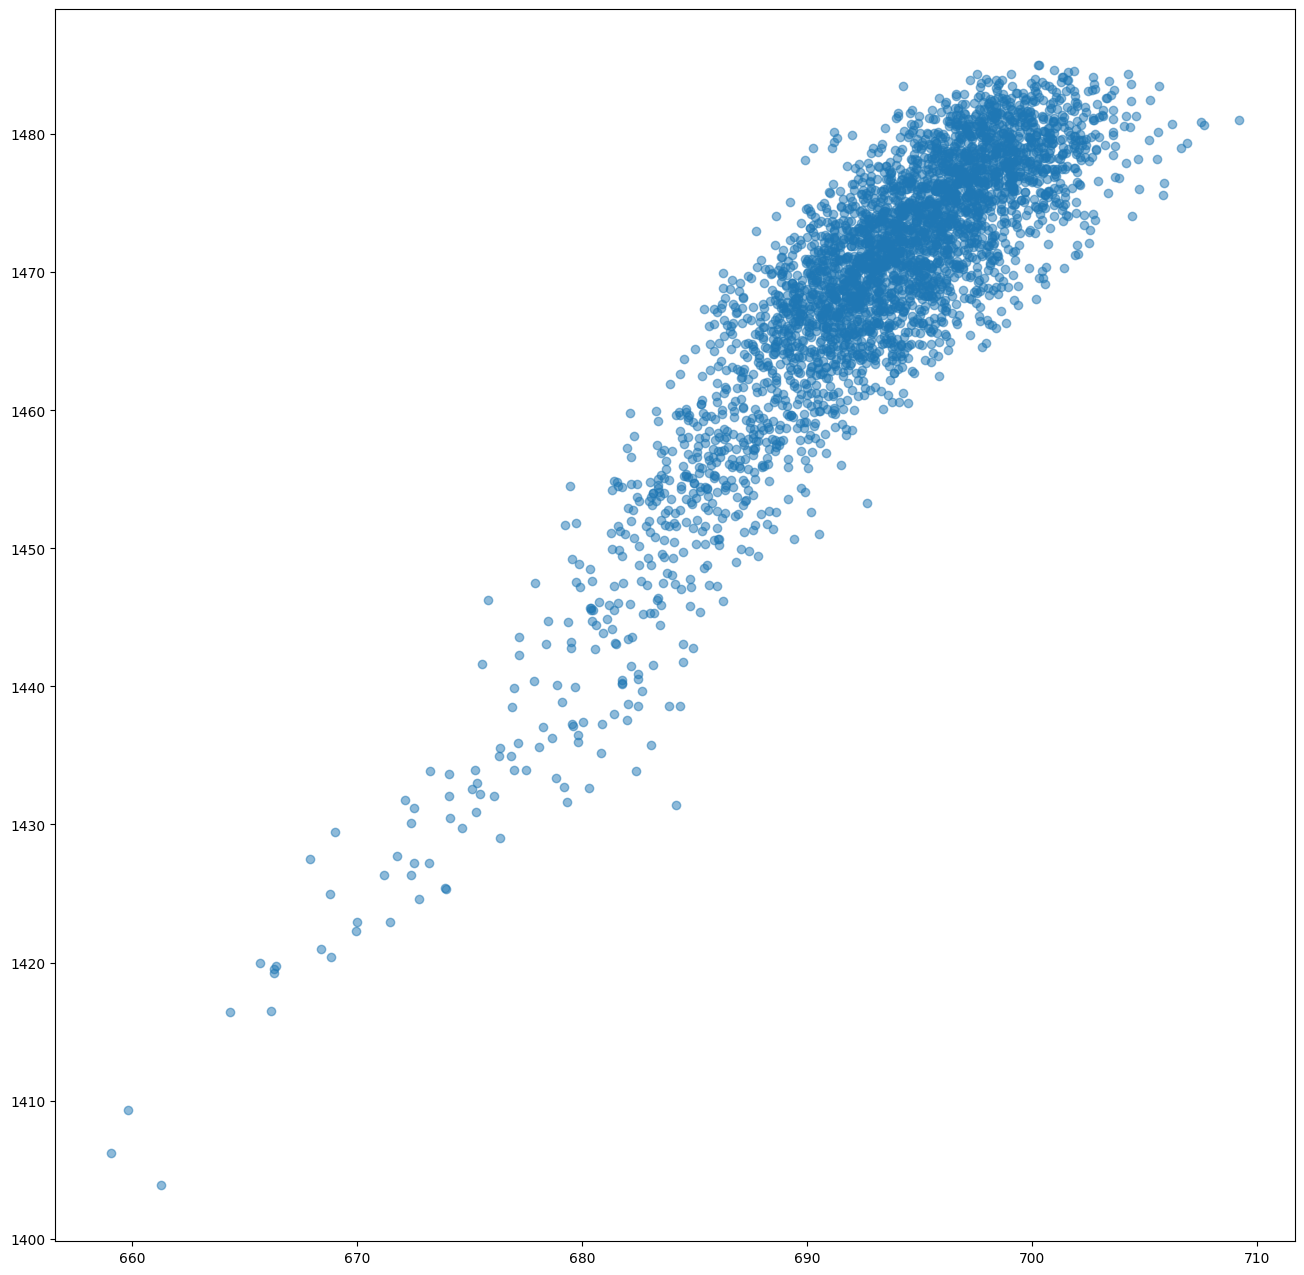

In [11]:
plt.figure(figsize=(16, 16))
plt.scatter(X_transformed[:,0],X_transformed[:,1], alpha= 0.5)
plt.show()

### PCA from pca

In [12]:
from sklearn.cluster import AgglomerativeClustering


model = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=25)
y = model.fit_predict(MinMaxScaler().fit_transform(X))
print(model.n_clusters_)

5


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [19] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[14]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


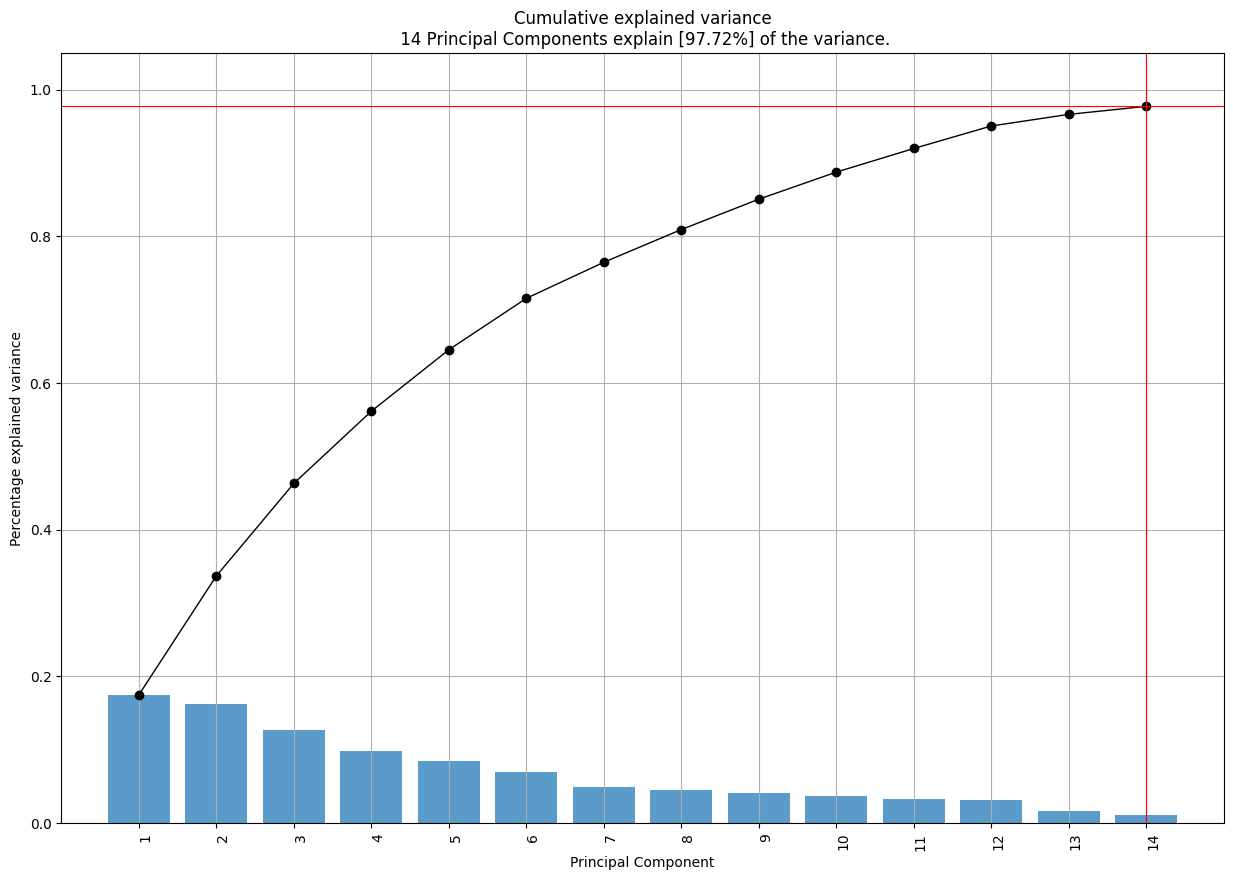

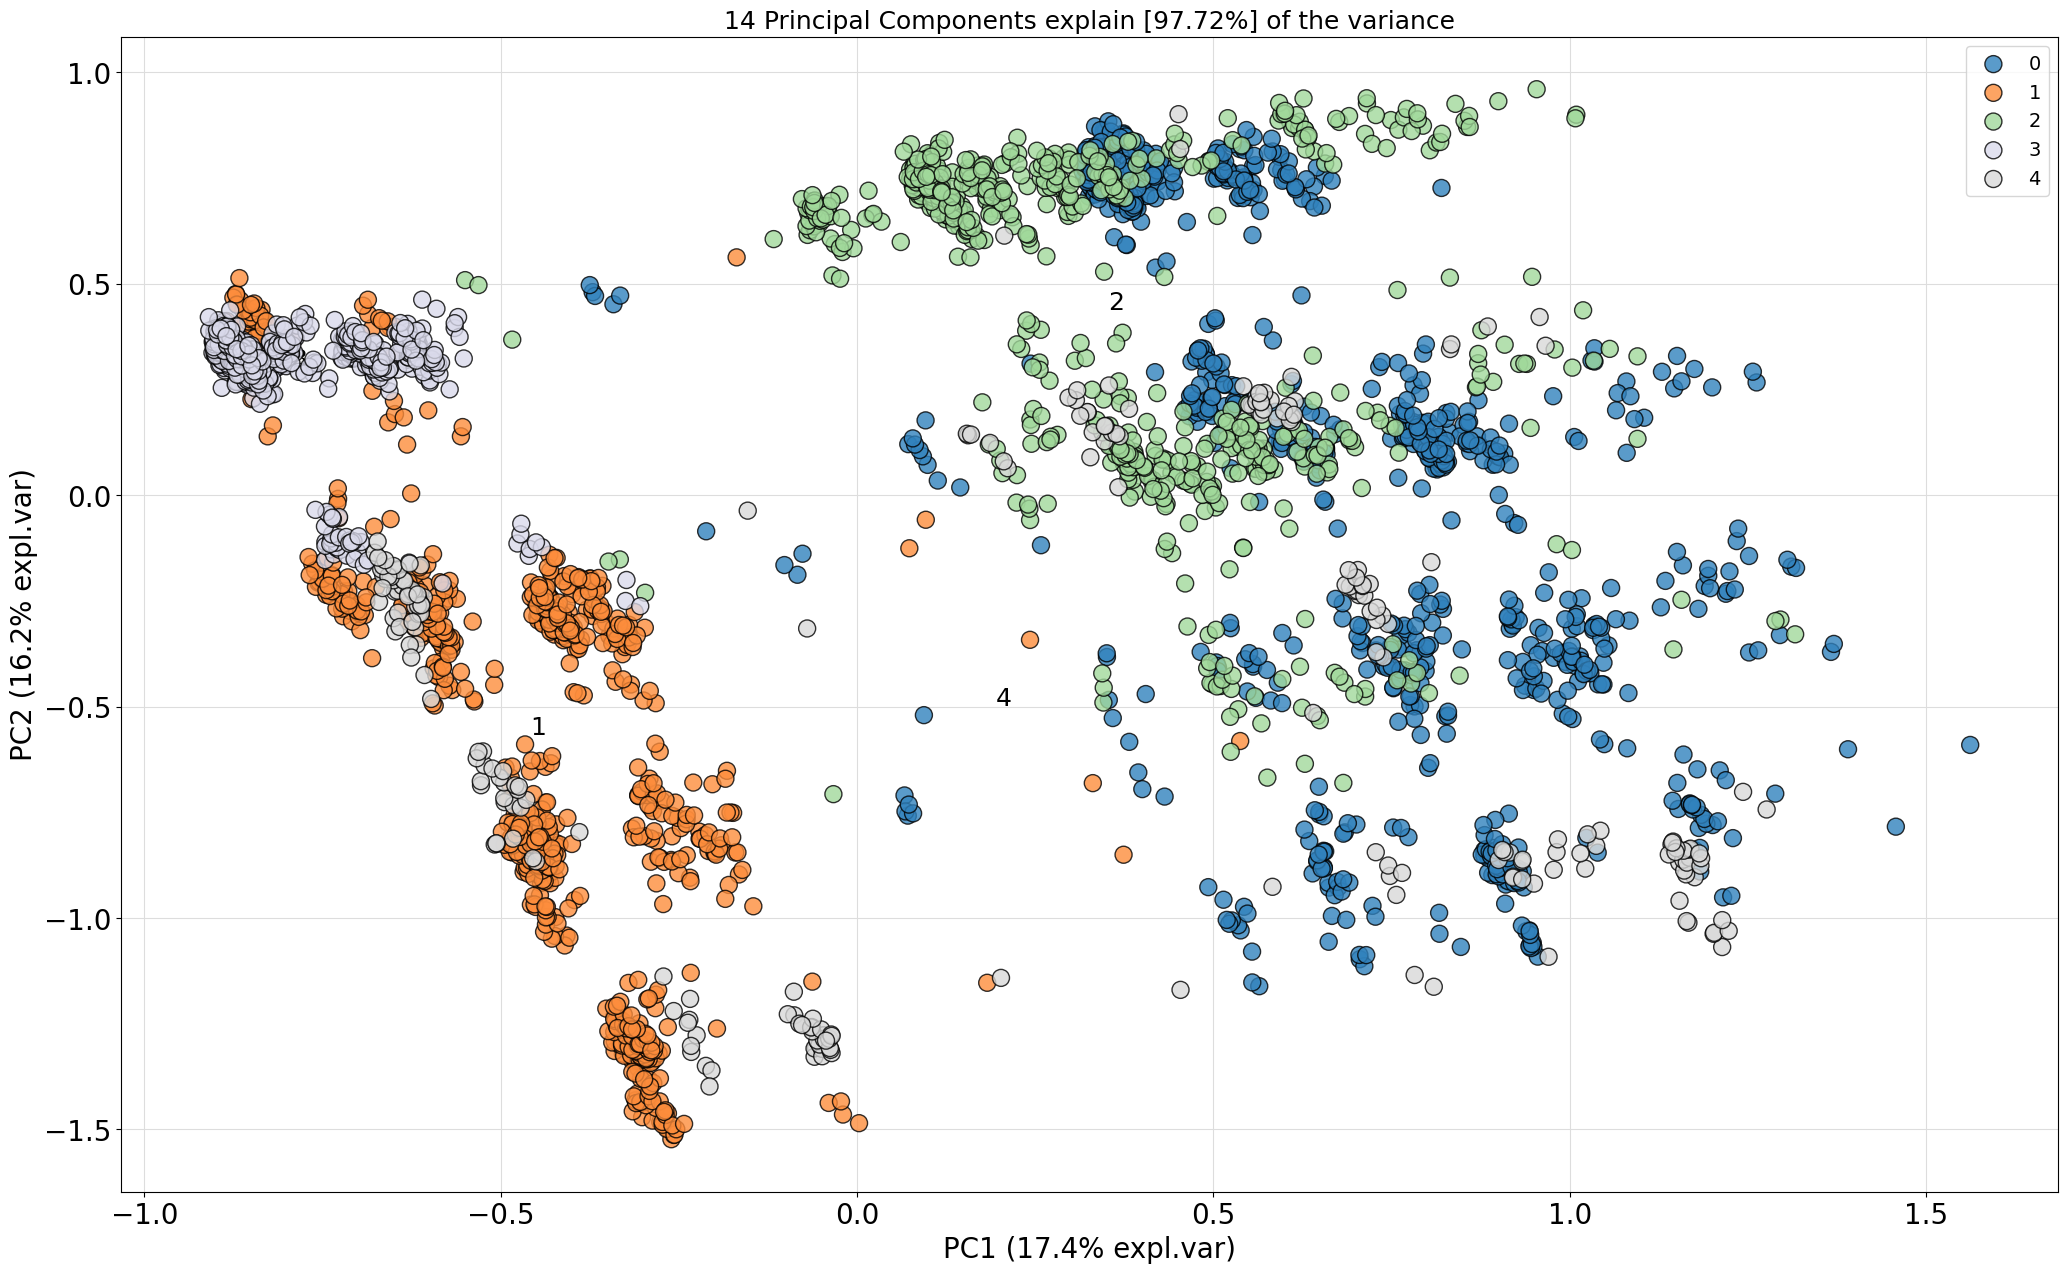

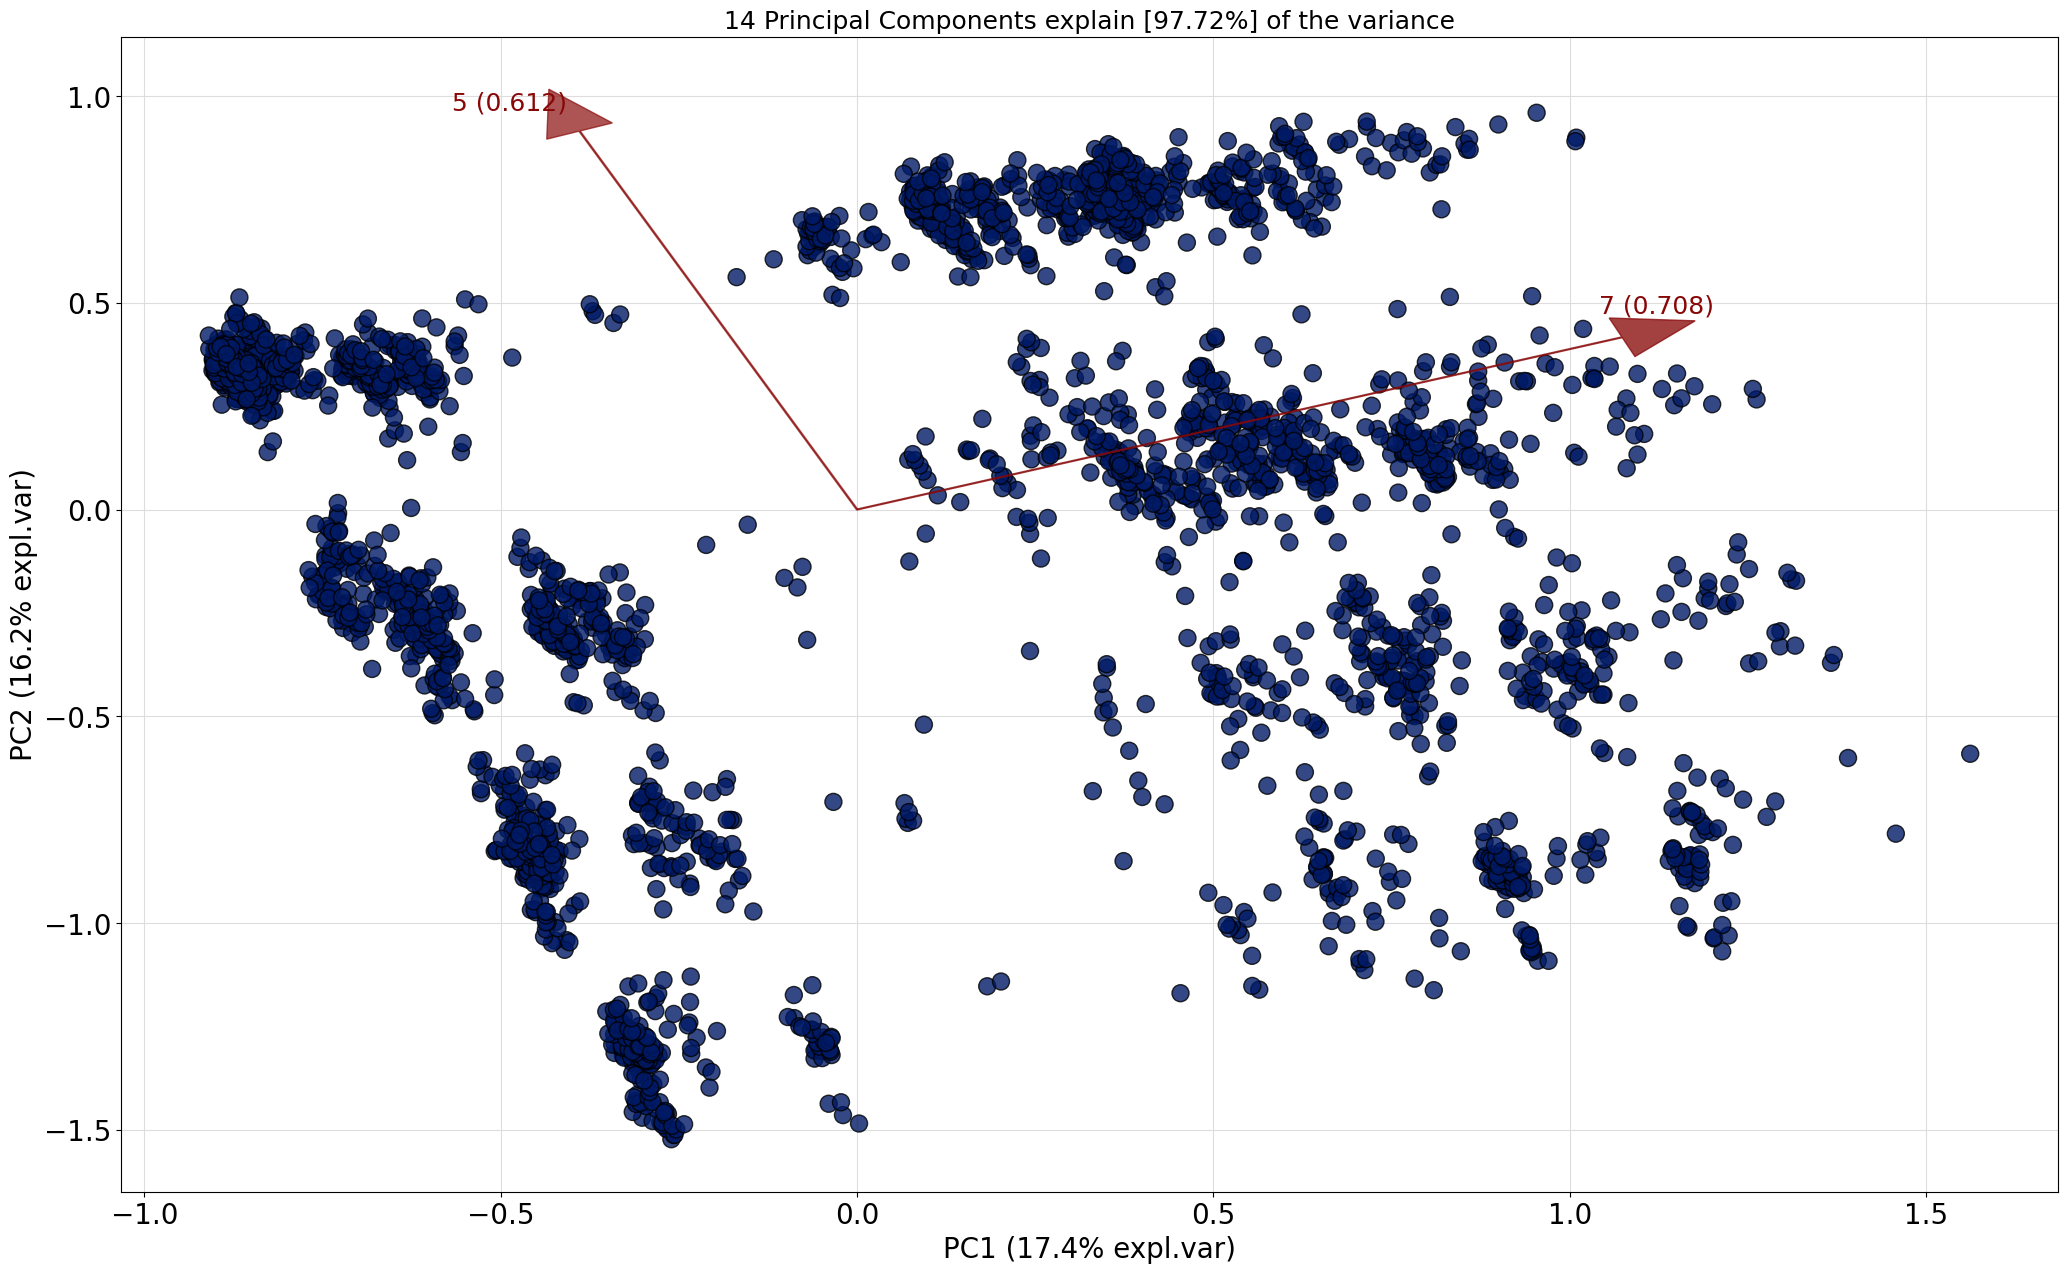

In [13]:
from pca import pca

pca_2 = pca(n_components=14)

results = pca_2.fit_transform(MinMaxScaler().fit_transform(X))

fig, ax = pca_2.plot()

fig, ax = pca_2.scatter(labels=y)

fig, ax = pca_2.biplot(n_feat=2)

# t-SNE

In [42]:
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", len(np.unique(colors))))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int64)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add labels
    txts = []
    for i in range(len(np.unique(colors))):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txts.append(txt)

    return f, ax, sc, txts

In [19]:
from sklearn.manifold import TSNE

In [20]:
tSNE = TSNE(random_state=420, verbose=1)
X_proj = tSNE.fit_transform(MinMaxScaler().fit_transform(X))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3490 samples in 0.001s...
[t-SNE] Computed neighbors for 3490 samples in 0.102s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3490
[t-SNE] Computed conditional probabilities for sample 2000 / 3490
[t-SNE] Computed conditional probabilities for sample 3000 / 3490
[t-SNE] Computed conditional probabilities for sample 3490 / 3490
[t-SNE] Mean sigma: 0.309686
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.398384
[t-SNE] KL divergence after 1000 iterations: 0.552630


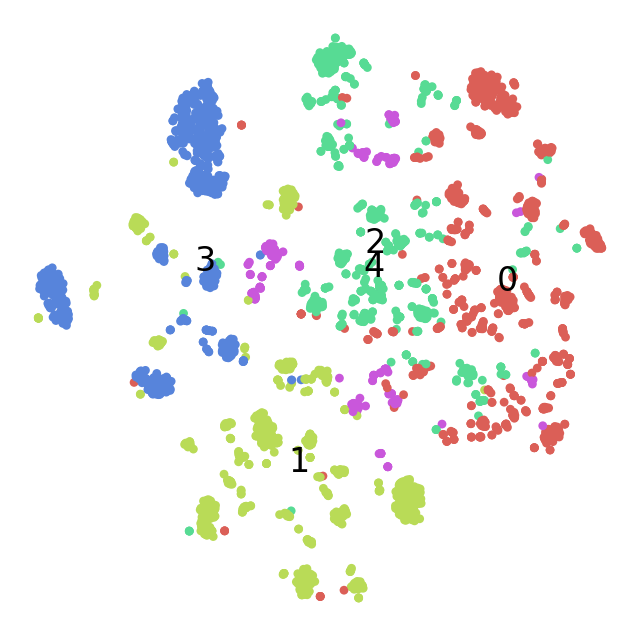

In [43]:
scatter(X_proj, y)
plt.show()

# NMF

### TODO

In [18]:
from sklearn.decomposition import NMF

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline


nmf = NMF(n_components=2, init='random', random_state=0)
scaler = MinMaxScaler()

pipe = make_pipeline(scaler,nmf)

X_transformed = pipe.fit_transform(X)


In [20]:
X_transformed.shape

(3490, 2)

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(0.2238238144274779, 0.663304391604828, '0'),
  Text(0.47484727641293273, 0.22396987786563347, '1'),
  Text(0.33961993516732397, 0.42599148757120375, '2'),
  Text(0.6463792153260842, 0.0026365474966463837, '3'),
  Text(0.3209927195476379, 0.4988006856729128, '4')])

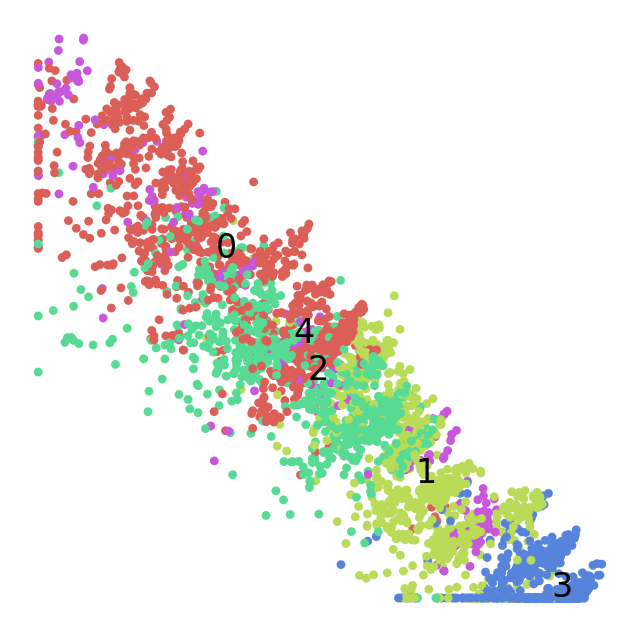

In [21]:
scatter(X_transformed,y)

# Summary:
* It is good to use MinMax before using PCA
* It is good to not make any scalling before tSNE
* NMF gives strange results
* UMAP: tba